<a href="https://colab.research.google.com/github/tohooni/DeepRunning/blob/master/01_%ED%85%90%EC%84%9C%ED%94%84%EB%A1%9C%EC%9A%B0%EB%A1%9C_LinearRegressor%EC%82%AC%EC%9A%A9_NOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')


from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from sklearn import metrics
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.python.data import Dataset



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


ValueError: ignored

In [0]:
!git clone https://github.com/tohooni/DeepRunning.git

Cloning into 'DeepRunning'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [0]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

In [0]:
california_housing_dataframe.info

<bound method DataFrame.info of        longitude  latitude  ...  median_income  median_house_value
0         -114.3      34.2  ...            1.5             66900.0
1         -114.5      34.4  ...            1.8             80100.0
2         -114.6      33.7  ...            1.7             85700.0
3         -114.6      33.6  ...            3.2             73400.0
4         -114.6      33.6  ...            1.9             65500.0
...          ...       ...  ...            ...                 ...
16995     -124.3      40.6  ...            2.4            111400.0
16996     -124.3      40.7  ...            2.5             79000.0
16997     -124.3      41.8  ...            3.0            103600.0
16998     -124.3      41.8  ...            2.0             85800.0
16999     -124.3      40.5  ...            3.0             94600.0

[17000 rows x 9 columns]>

In [0]:
california_housing_dataframe.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66900.0
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80100.0
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85700.0
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73400.0
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65500.0


In [0]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


In [0]:
california_housing_dataframe = california_housing_dataframe.reindex(np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12607,-121.7,37.9,17.0,1962.0,291.0,825.0,267.0,4.9,187.1
13854,-122.0,37.4,25.0,2074.0,387.0,1273.0,383.0,4.8,378.0
421,-117.0,32.8,33.0,2432.0,443.0,1147.0,427.0,3.4,138.1
5064,-118.1,34.0,32.0,3775.0,786.0,2416.0,792.0,3.7,247.6
9049,-119.0,37.6,18.0,1795.0,416.0,483.0,208.0,4.5,169.8


In [0]:
#1단계 : 특성 정의 및 특성 열 구성
#지역별 방개수만 별도로 추출한다.
my_feature = california_housing_dataframe[["total_rooms"]]

#텐서플로우의 특성의 데이터 유형을 지정할때 특성열이라는 구조체를 사용한다.
#특성열은 특성 데이터에 대한 설명만 저장하고 데이터는 포함하지 않는다.
feature_columns = [tf.feature_column.numeric_column("total_rooms")]
# feature_columns
my_feature.head(5)

,total_rooms
12607,1962.0
13854,2074.0
421,2432.0
5064,3775.0
9049,1795.0


In [0]:
#2단계 타겟 정의
#레이블 정의
targets = california_housing_dataframe["median_house_value"]
targets.head(5)

12607   187.1
13854   378.0
421     138.1
5064    247.6
9049    169.8
Name: median_house_value, dtype: float64

In [0]:
#3단계 : LinearRegressor 구성
#미니 배치 확률적 경사하강법(SGD)를 구현하는 GradiantDescentOptimizer를 사용하여 이 모델을 학습시킬 것입니다.
#learning_rate 인수는 경사 단계릐 크기를 조절 합니다.

my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimzer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer,5.0)

linear_regressor = tf.estimator.LinearRegressor(
    feature_columns = feature_columns, optimizer=my_optimizer
)


In [0]:
#4단계 입력함수 정의
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
 
  #판다스의 딕셔너리 데이터를 넘파이 배열로 바꾼다.
  features = {key:np.array(value) for key, value in dict(features).items()}

  #print(features)
  #텐서플로의 DatasetAPI를 활용하여 데이터 세트 개체를 생성하고
  #batch_size크기의 배치로 나누어 지정한 세대 수만큼 반복 한다.

  ds = Dataset.from_tensor_slices((features,targets))
  # print(ds)
  ds = ds.batch(batch_size).repeat(num_epochs)
  # print(ds)
  #데이터 셔플
  if shuffle:
    ds = ds.shuffle(buffer_size=10000)

  #다음 배치에 리턴할 데이터
  # print(ds.make_one_shot_iterator().get_next())
  features, labels = ds.make_one_shot_iterator().get_next()
  return features, labels

In [0]:
#5단계: 모델 학습
#이제 linear_regressor로부터 train()을 호출하여 모델을 학습시킬 수 있습니다. my_feature 및 target을 인수로 전달할 수 있도록 my_input_fn을 lambda에 래핑하겠습니다. 자세한 내용은 텐서플로우 입력 함수 가이드를 참조하세요. 처음에는 100단계만 학습하려고 합니다.

_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100
)

In [0]:
#6단계 : 모델 평가
#모델이 학습 중에 학습 데이터에 얼마나 맞춰졌는지 확인하기 위해 학습 데이터로 예측을 실행하겠습니다.
#참고: 학습 오차는 모델이 학습 데이터에 얼마나 맞춰졌는지를 나타내는 척도이지만 모델이 새 데이터로 일반화되는 정도를 측정하지는 않습니다. 이후 실습에서는 모델의 일반화 능력을 평가할 수 있도록 데이터를 분할하는 방법을 알아봅니다.

# Create an input function for predictions.
# Note: Since we're making just one prediction for each example, we don't 
# need to repeat or shuffle the data here.
prediction_input_fn =lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions.
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)


Mean Squared Error (on training data): 215683748597555328.000
Root Mean Squared Error (on training data): 464417644.580


In [0]:
#우수한 모델인가요? 이 오차가 얼마나 큰지 어떻게 판단할 수 있을까요?
#평균 제곱 오차(MSE)는 해석하기가 어려울 수 있으므로 평균 제곱근 오차(RMSE)를 대신 참고하는 경우가 많습니다. RMSE의 장점은 원래 타겟과 동일한 척도로 해석할 수 있다는 것입니다.
#RMSE를 타겟의 최소값과 최대값의 차와 비교해 보겠습니다.

min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print("Min. Median House Value: %0.3f" % min_house_value)
print("Max. Median House Value: %0.3f" % max_house_value)
print("Difference between Min. and Max.: %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. Median House Value: 14.999
Max. Median House Value: 500.001
Difference between Min. and Max.: 485.002
Root Mean Squared Error: 464417644.580


In [0]:
#오차 범위가 타겟 값 범위의 거의 절반에 달합니다. 오차를 이보다 줄일 수 있을까요?
#이 질문이야말로 모든 모델 개발자들의 숙제입니다. 모델 오차를 줄이는 몇 가지 기본적인 전략을 수립해 보겠습니다.
#가장 처음에 할 수 있는 일은 전반적 요약 통계를 참조하여 예측과 타겟의 일치율을 조사하는 것입니다.

calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()


,predictions,targets
count,17000.0,17000.0
mean,-464411648.0,207.3
std,496273.6,116.0
min,-465018528.0,15.0
25%,-464686176.0,119.4
50%,-464534784.0,180.4
75%,-464301632.0,265.0
max,-456383008.0,500.0


In [0]:
#이 정보는 유용해 보입니다. 평균 값을 모델의 RMSE와 비교해 보면 어떠한가요? 다양한 분위는 어떠한가요?
#학습한 데이터와 선을 시각화할 수도 있습니다. 단일 특성에 대한 선형 회귀는 입력 x를 출력 y에 매핑하는 직선으로 표현될 수 있습니다.
#우선 판독 가능한 산포도를 그릴 수 있도록 균일한 무작위 데이터 샘플을 추출하겠습니다.

sample = california_housing_dataframe.sample(n=300)

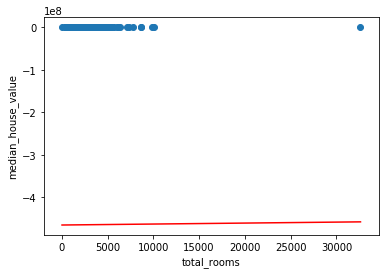

In [0]:
#다음으로는 산포도와 함께 모델의 바이어스 항와 특성 가중치를 바탕으로 학습한 선을 그리겠습니다. 이 선은 빨간색으로 표시됩니다.

# Get the min and max total_rooms values.
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

# Plot a scatter plot from our data sample.
plt.scatter(sample["total_rooms"], sample["median_house_value"])

# Display graph.
plt.show()

#이 최초 선은 상당히 이탈된 상태입니다. 요약 통계를 다시 조사하여 이 선이 나타내는 정보와 부합하는지 확인해 보세요.
#이러한 초기 상태 확인을 통해 훨씬 더 나은 선을 찾을 수 있다는 점을 알 수 있습니다.

In [0]:
#모델 초매개변수 조정이 실습에서는 편의를 위해 위 모든 코드를 단일 함수에 넣었습니다. 다른 매개변수로 함수를 호출하여 효과를 확인할 수 있습니다.
#이 함수에서 균등하게 10개로 나눈 기간으로 학습을 진행하여 모델의 개선을 기간별로 살펴보겠습니다.
#각 기간에 대한 학습 손실을 계산하고 그래프로 그리겠습니다. 이를 통해 모델이 수렴되는 시점을 판단하거나 반복이 더 필요함을 확인할 수 있습니다.
#또한 모델이 학습한 특성 가중치와 바이어스 항을 시간별로 도식화하겠습니다. 이는 모델이 수렴되는 모습을 확인하는 또 다른 방법입니다.

def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = california_housing_dataframe[[my_feature]]
  my_label = "median_house_value"
  targets = california_housing_dataframe[my_label]

  # Create feature columns.
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Create input functions.
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = california_housing_dataframe.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

Training model...
RMSE (on training data):
  period 00 : 236.32
  period 01 : 235.11
  period 02 : 233.90
  period 03 : 232.70
  period 04 : 231.50
  period 05 : 230.31
  period 06 : 229.13
  period 07 : 227.96
  period 08 : 226.79
  period 09 : 225.63
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,13.2,207.3
std,10.9,116.0
min,0.0,15.0
25%,7.3,119.4
50%,10.6,180.4
75%,15.8,265.0
max,189.7,500.0


Final RMSE (on training data): 225.63


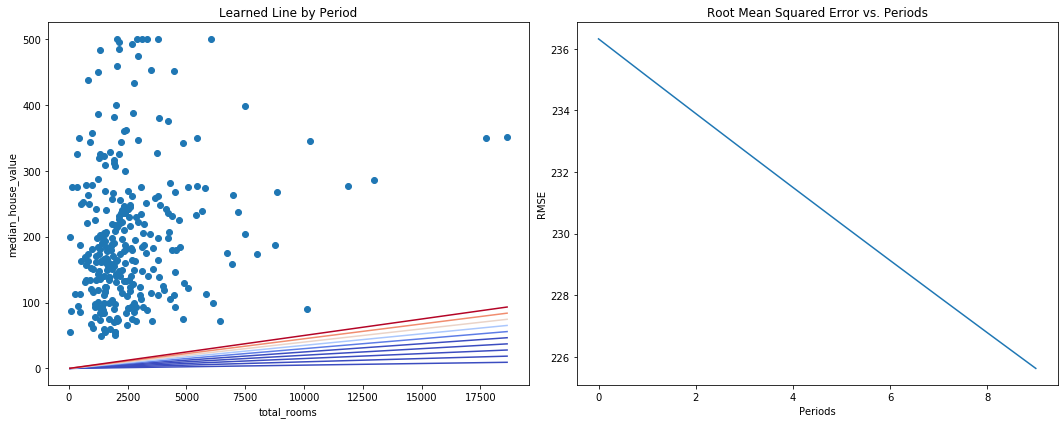

In [0]:
#작업 1: 180 이하의 RMSE 달성
#모델 초매개변수를 조정하여 타겟 분포와 더 잘 일치하도록 손실을 개선합니다. 5분이 지나도록 RMSE를 180 이하로 떨어뜨리지 못한 경우 해결 방법에을 확인하여 가능한 조합을 알아보세요.

train_model(
    learning_rate=0.00001,
    steps=100,
    batch_size=1
)

In [0]:
(lambda x,y:x+y)(10,20)

30

In [0]:
aa=map(lambda x:x**2, range(5))

In [0]:
print(aa{0})

SyntaxError: ignored

In [0]:
list(map(lambda x:x**2)(range(5)))

TypeError: ignored